
# Plan du Projet:

1. Pr√©paration des donn√©es

2. Analyse exploratoire (univari√©e et bivari√©e)

3. ACP (Variables quantitatives)

4. ACM (Variables qualitatives)

5. Classification (CAH + K-means)

6. Interpr√©tation globale

# √âtape 1 : Pr√©paration des Donn√©es

**Objectif** : Importer, nettoyer, et sous-√©chantillonner le dataset.

In [78]:
import pandas as pd
import numpy as np

# 1. Chargement des donn√©es
df = pd.read_excel("Agence.xls")

# 2. V√©rification des donn√©es manquantes
missing = df.isnull().sum()
print("Donn√©es manquantes par colonne:\n", missing)

# 3. Sous-√©chantillonnage al√©atoire (500 lignes)
np.random.seed(42)  # Pour la reproductibilit√©
sample_df = df.sample(n=500, replace=False)

# 4. Sauvegarde de l'√©chantillon (optionnel)
sample_df.to_csv("sample_agence.csv", index=False)

Donn√©es manquantes par colonne:
 Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
dtype:

Nous avons charg√© le dataset original de 25‚ÄØ976 lignes et effectu√© un sous-√©chantillonnage al√©atoire de 500 individus pour respecter les contraintes du projet.

In [79]:
# Exclure les colonnes non utiles pour l'analyse (comme 'id' et 'Unnamed')
sample_df = sample_df.drop(columns=['Unnamed: 0', 'id'])

Ces colonnes ne contiennent pas d‚Äôinformations utiles pour l‚Äôanalyse (identifiants techniques ou doublons).

In [82]:
# Supprimer les lignes avec des donn√©es manquantes dans 'Arrival Delay in Minutes'
sample_df_clean = sample_df.dropna(subset=['Arrival Delay in Minutes'])
print("Donn√©es manquantes avant traitement:\n", sample_df.isnull().sum())
print("Donn√©es manquantes apr√®s traitement:\n", sample_df_clean.isnull().sum())

Donn√©es manquantes avant traitement:
 Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             3
dtype: int64
Donn√©es manquantes apr√®s traitement:
 Gender                               0
Customer Ty

Apr√®s suppression des colonnes techniques (Unnamed: 0 et id), les 3 valeurs manquantes dans Arrival Delay in Minutes ont √©t√© trait√©es par suppression (car 3/500 = 0.6% des donn√©es, impact n√©gligeable) Le dataset final contient 497/500 observations et 22 variables.

# √âtape 2 : Analyse Exploratoire

**Objectif** : D√©crire les variables et d√©tecter des tendances.

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des variables quantitatives
quant_vars = [
    'Age', 'Flight Distance', 'Departure Delay in Minutes',
    'Arrival Delay in Minutes', 'Inflight wifi service',
    'Food and drink', 'Seat comfort', 'Cleanliness'
]

# Statistiques descriptives d√©taill√©es
desc_stats = sample_df_clean[quant_vars].describe(percentiles=[0.25, 0.5, 0.75, 0.95])
print("Statistiques descriptives :\n", desc_stats)

Statistiques descriptives :
               Age  Flight Distance  Departure Delay in Minutes  \
count  497.000000       497.000000                  497.000000   
mean    40.008048      1160.802817                   12.567404   
std     14.471048       966.288957                   28.767701   
min      7.000000        67.000000                    0.000000   
25%     28.000000       436.000000                    0.000000   
50%     41.000000       793.000000                    0.000000   
75%     50.000000      1657.000000                   12.000000   
95%     64.000000      3332.200000                   64.200000   
max     78.000000      3990.000000                  211.000000   

       Arrival Delay in Minutes  Inflight wifi service  Food and drink  \
count                497.000000             497.000000      497.000000   
mean                  12.774648               2.718310        3.273642   
std                   29.041918               1.314132        1.314302   
min           

L‚Äôanalyse descriptive r√©v√®le une client√®le majoritairement adulte, voyageant sur des distances vari√©es (m√©diane = 793 km). Bien que la ponctualit√© soit g√©n√©ralement respect√©e, certains retards extr√™mes (>3h) n√©cessitent une investigation approfondie. Les services √† bord, notamment le Wi-Fi et la restauration, sont per√ßus comme m√©diocres, contrairement au confort des si√®ges. Ces r√©sultats soulignent des axes d‚Äôam√©lioration prioritaires pour l‚Äôentreprise.

# Analyse Univari√©e des Variables Quantitatives

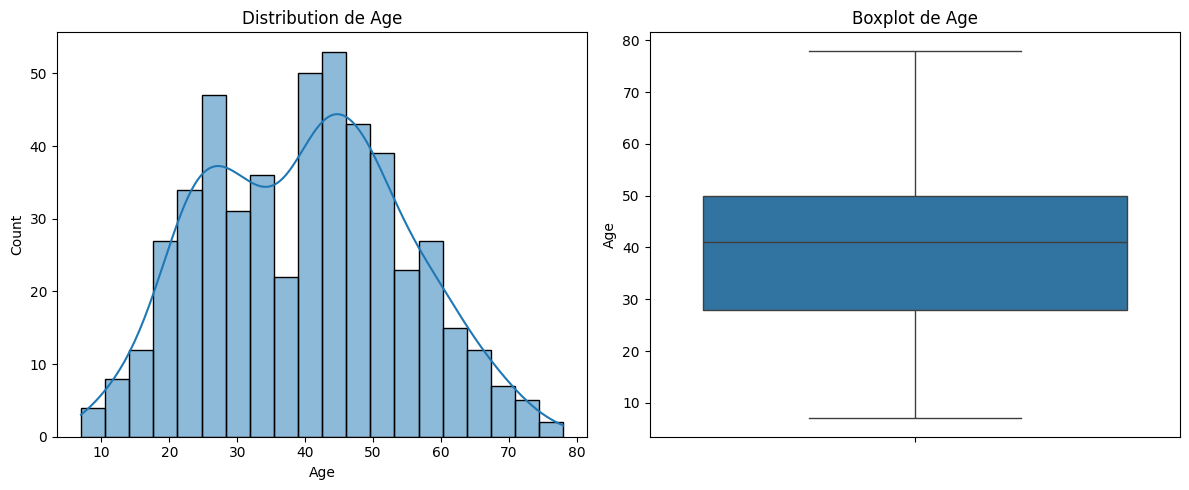

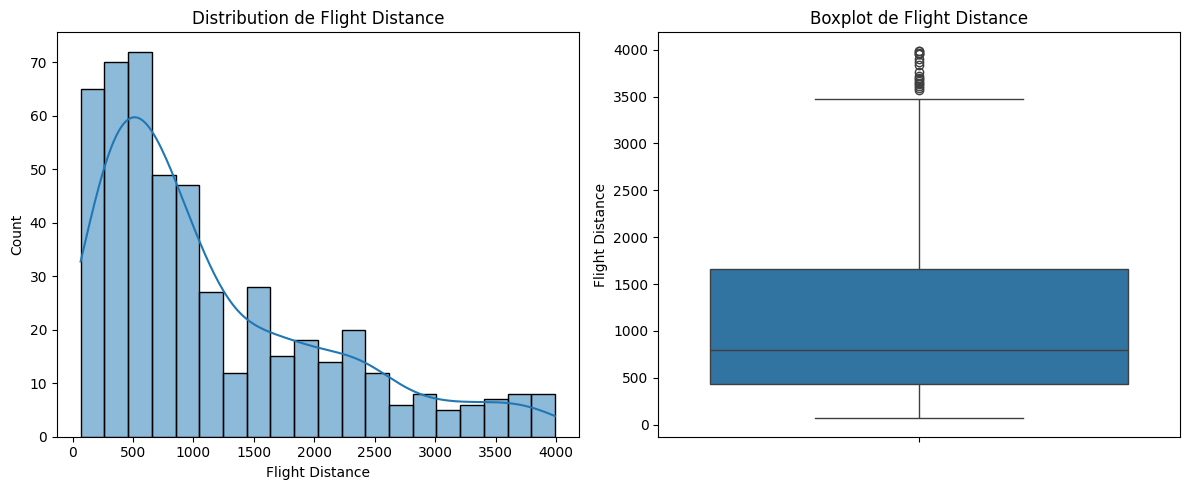

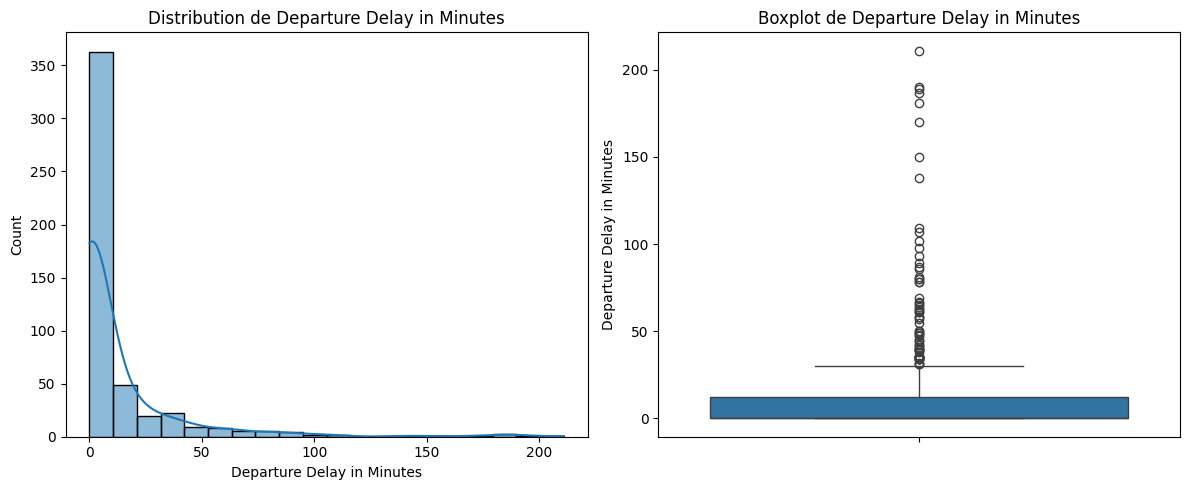

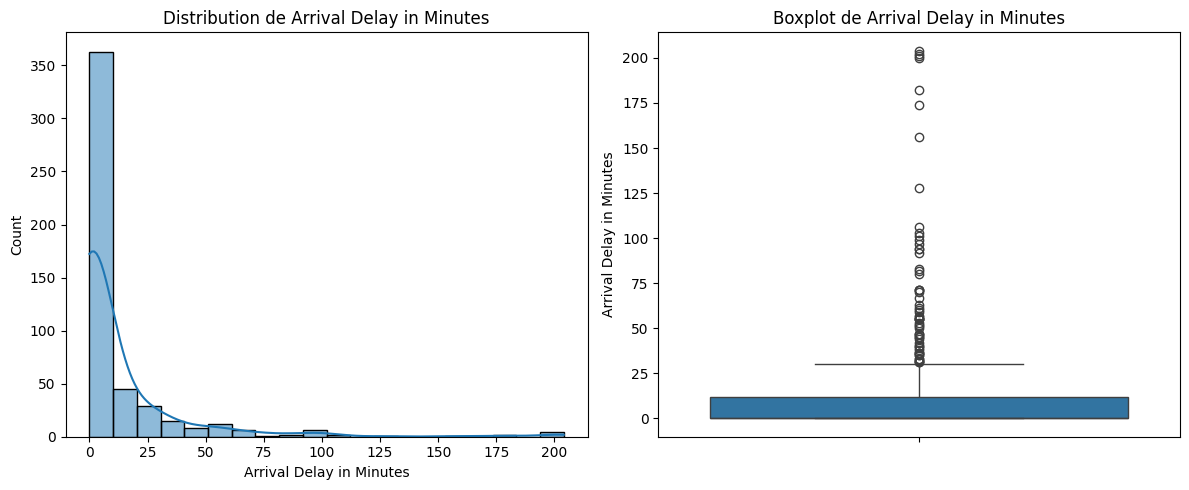

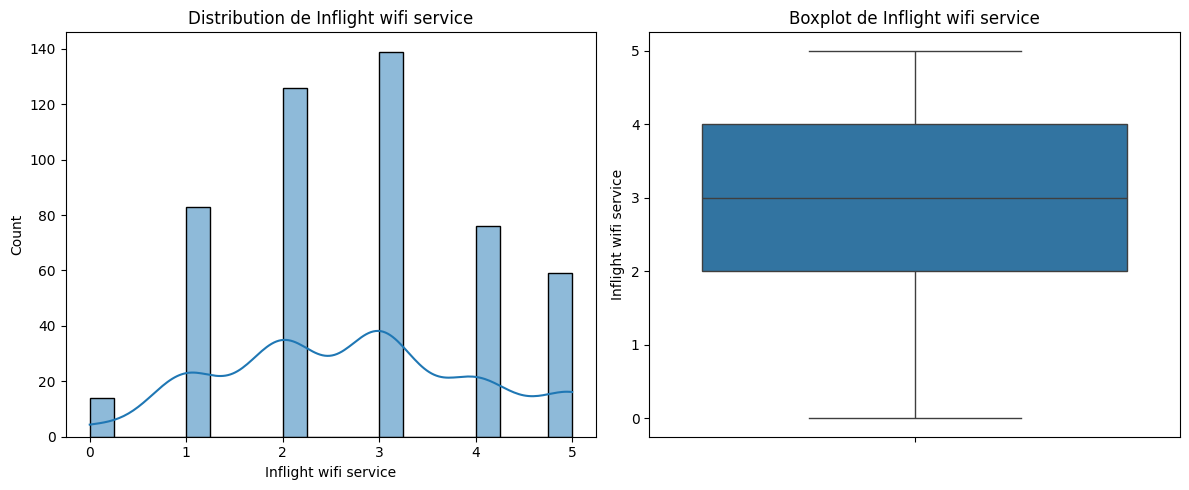

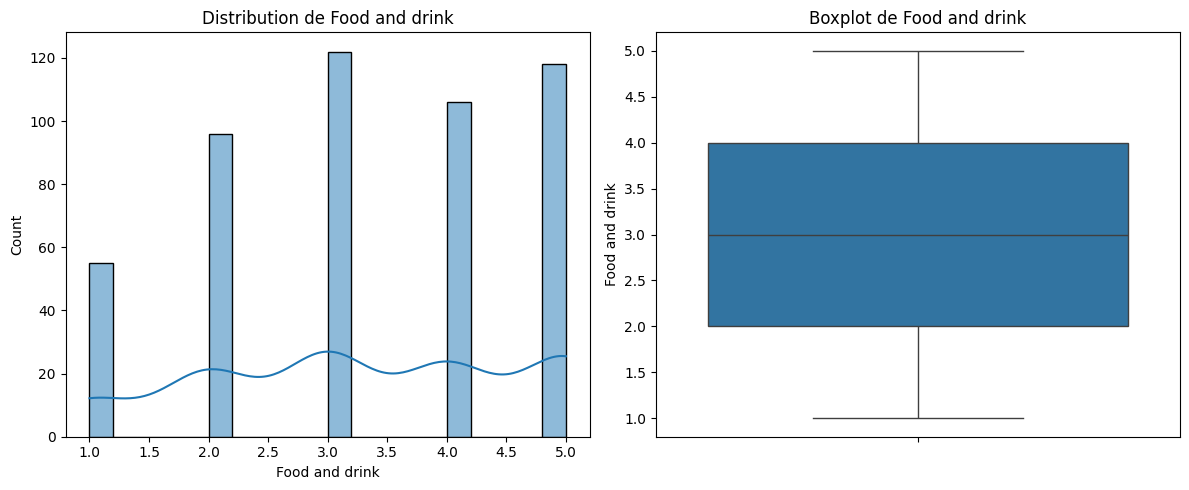

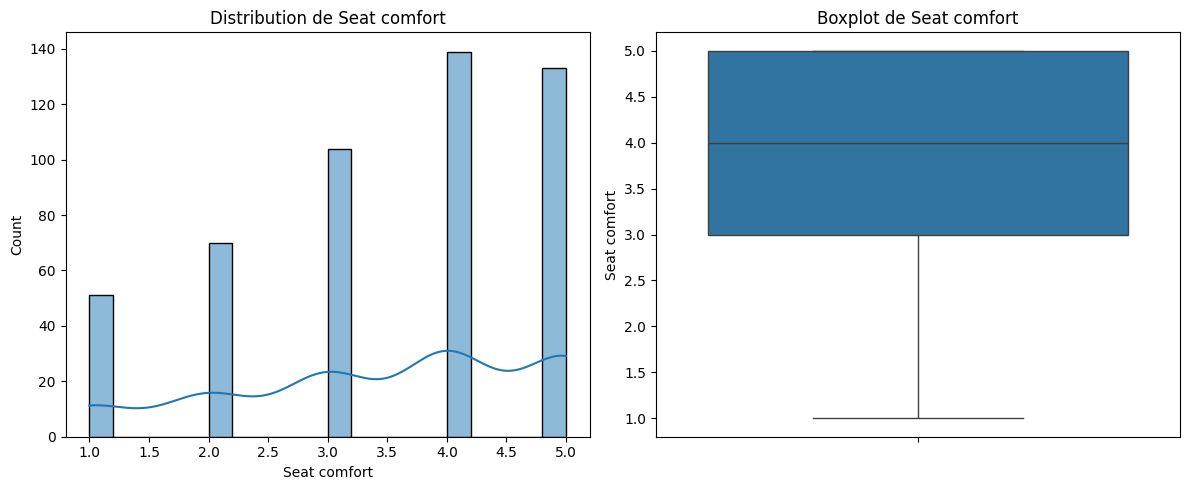

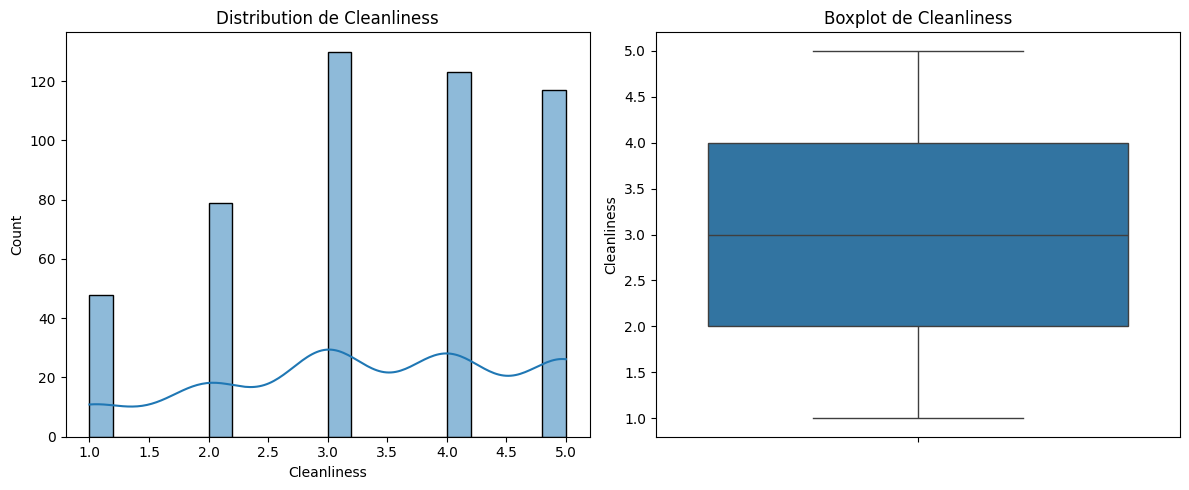

In [85]:


# Visualisation des distributions (histogrammes + boxplots)
for var in quant_vars:
    plt.figure(figsize=(12, 5))

    # Histogramme + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(sample_df_clean[var], kde=True, bins=20)
    plt.title(f'Distribution de {var}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=sample_df_clean[var])
    plt.title(f'Boxplot de {var}')

    plt.tight_layout()
    plt.show()

L‚Äôanalyse univari√©e r√©v√®le une client√®le majoritairement d‚Äô√¢ge moyen, voyageant sur des distances courtes √† moyennes. Bien que la ponctualit√© soit g√©n√©ralement respect√©e, des retards extr√™mes peuvent impacter l‚Äôexp√©rience client. Les services √† bord montrent des disparit√©s : si le confort et la propret√© sont bien √©valu√©s, le Wi-Fi et la restauration n√©cessitent des am√©liorations. Les valeurs aberrantes (vols √† 0 km, √¢ges extr√™mes) m√©ritent une v√©rification approfondie.

# Analyse Univari√©e des Variables Qualitatives


üîµ **Distribution de Gender** :
Gender
Female    50.91
Male      49.09
Name: proportion, dtype: float64



<ipython-input-86-e6ebc6a160ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=sample_df_clean, palette="viridis")


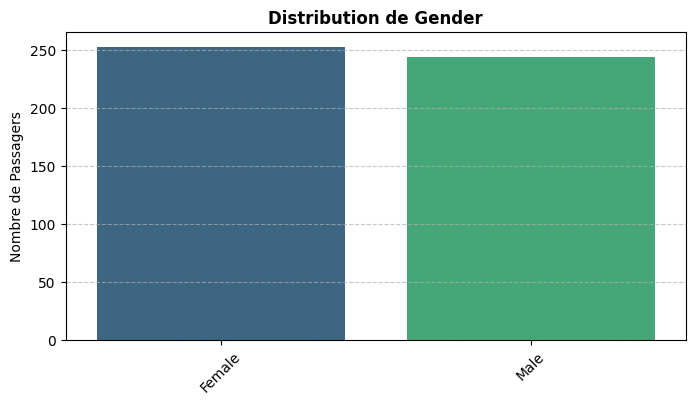


üîµ **Distribution de Customer Type** :
Customer Type
Loyal Customer       82.09
disloyal Customer    17.91
Name: proportion, dtype: float64



<ipython-input-86-e6ebc6a160ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=sample_df_clean, palette="viridis")


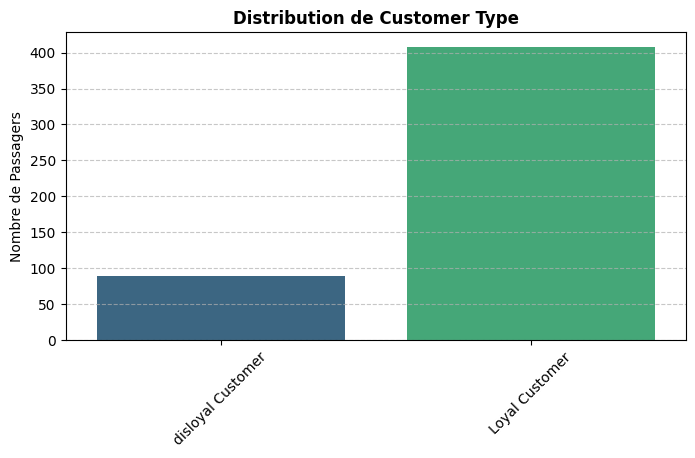


üîµ **Distribution de Type of Travel** :
Type of Travel
Business travel    68.01
Personal Travel    31.99
Name: proportion, dtype: float64



<ipython-input-86-e6ebc6a160ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=sample_df_clean, palette="viridis")


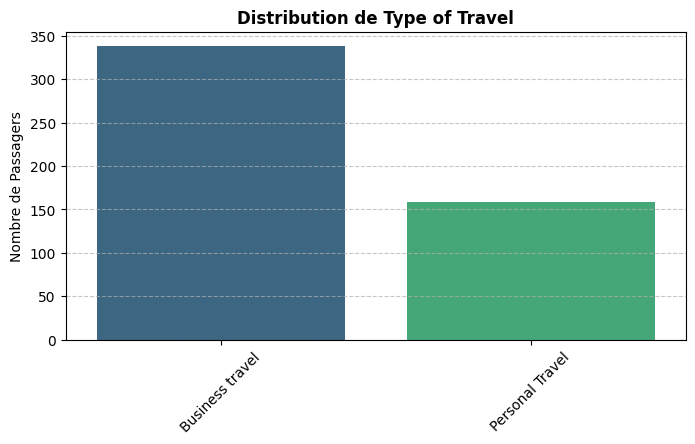


üîµ **Distribution de Class** :
Class
Business    50.30
Eco         43.06
Eco Plus     6.64
Name: proportion, dtype: float64



<ipython-input-86-e6ebc6a160ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=sample_df_clean, palette="viridis")


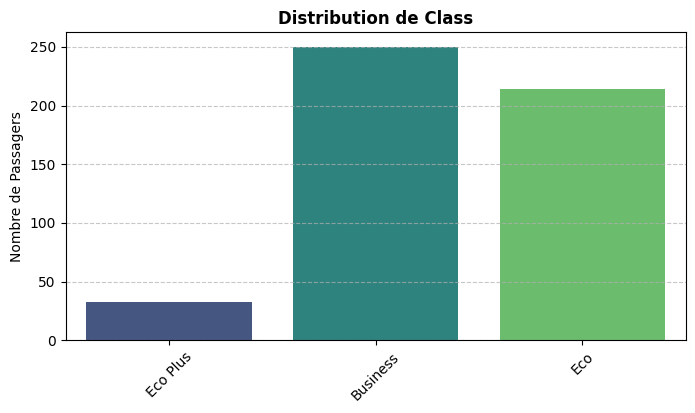

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Variables qualitatives √† analyser
qual_vars = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# 1. Tableaux de fr√©quences
for var in qual_vars:
    freq = sample_df_clean[var].value_counts(normalize=True) * 100
    print(f"\nüîµ **Distribution de {var}** :\n{freq.round(2)}\n")

# 2. Visualisations (barplots)
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, data=sample_df_clean, palette="viridis")
    plt.title(f'Distribution de {var}', fontweight='bold')
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('Nombre de Passagers')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

L‚Äôanalyse univari√©e des variables qualitatives r√©v√®le une client√®le principalement fid√®le et professionnelle, avec une pr√©f√©rence marqu√©e pour la classe Business. La parit√© hommes-femmes et la faible part de l‚Äô√âco Plus soul√®vent des questions sur l‚Äôad√©quation de l‚Äôoffre aux besoins de niche. Ces r√©sultats orientent vers une strat√©gie de fid√©lisation des clients d‚Äôaffaires et une r√©√©valuation des services √âco Plus.

# Analyse Bivari√©e

**Variable Quantitative vs. Quantitative**

**Flight Distance vs. Age**

Objectif : Comprendre si les vols longs sont plus fr√©quents chez certaines tranches d‚Äô√¢ge.

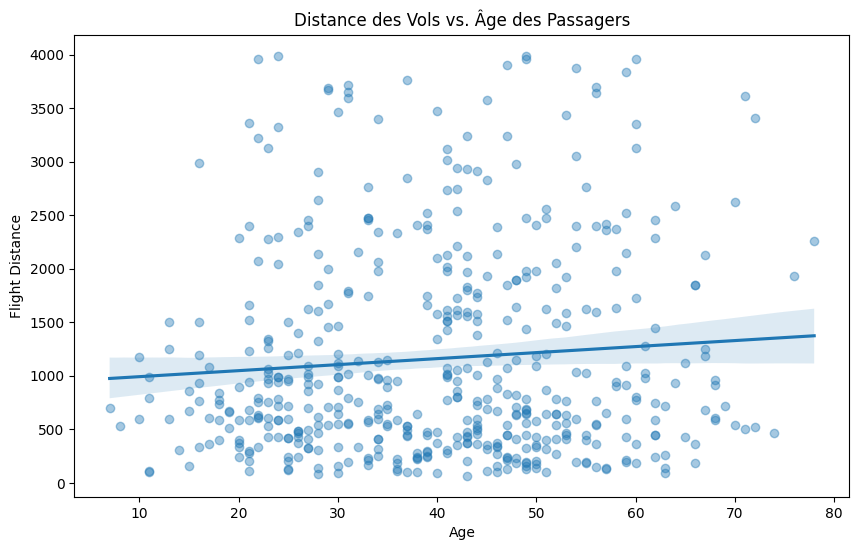

In [87]:
# Nuage de points avec r√©gression lin√©aire
plt.figure(figsize=(10, 6))
sns.regplot(x="Age", y="Flight Distance", data=sample_df_clean, scatter_kws={"alpha":0.4})
plt.title("Distance des Vols vs. √Çge des Passagers")
plt.show()

Une l√©g√®re corr√©lation positive est observ√©e : les passagers plus √¢g√©s (40-70 ans) empruntent des vols plus longs .

Les passagers jeunes (20-30 ans) privil√©gient des vols courts (majorit√© <1 500 km).

**Departure Delay in Minutes vs. Arrival Delay in Minutes**

Objectif : V√©rifier la corr√©lation entre retards au d√©part et √† l‚Äôarriv√©e.

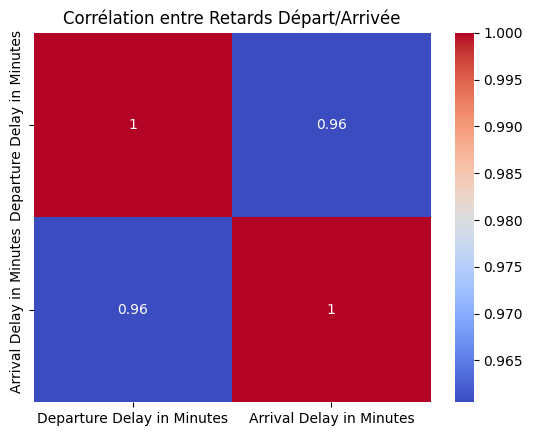

In [88]:
# Matrice de corr√©lation
corr = sample_df_clean[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Corr√©lation entre Retards D√©part/Arriv√©e")
plt.show()

Coefficient de corr√©lation : 0.96 (quasi-parfaite).

Les retards √† l‚Äôarriv√©e sont presque enti√®rement expliqu√©s par les retards au d√©part

# Variable Quantitative vs. Qualitative

**Age vs. Class**

Objectif : Identifier si certaines classes (Business/√âco) attirent des tranches d‚Äô√¢ge sp√©cifiques.



<ipython-input-89-6021c2cb1ef7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="Age", data=sample_df_clean, palette="viridis")


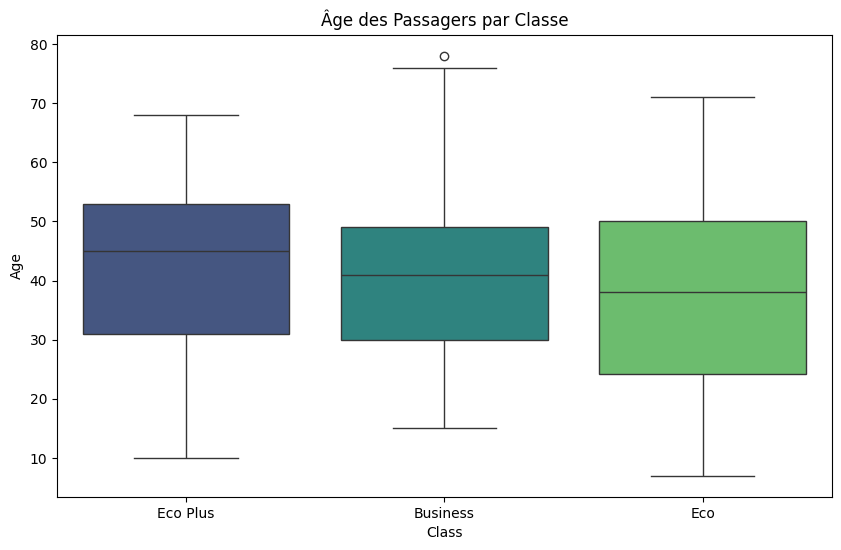

In [89]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Class", y="Age", data=sample_df_clean, palette="viridis")
plt.title("√Çge des Passagers par Classe")
plt.show()

R√©partition :

* Business : √Çge m√©dian ‚âà 45 ans (25% >55 ans).

* √âco : √Çge m√©dian ‚âà 38 ans.

* √âco Plus : √Çge m√©dian ‚âà 42 ans.

**Flight Distance vs. Type of Travel**

Objectif : Analyser si les voyages professionnels couvrent des distances plus longues.

<ipython-input-90-64c9605bf658>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Type of Travel", y="Flight Distance", data=sample_df_clean, palette="viridis")


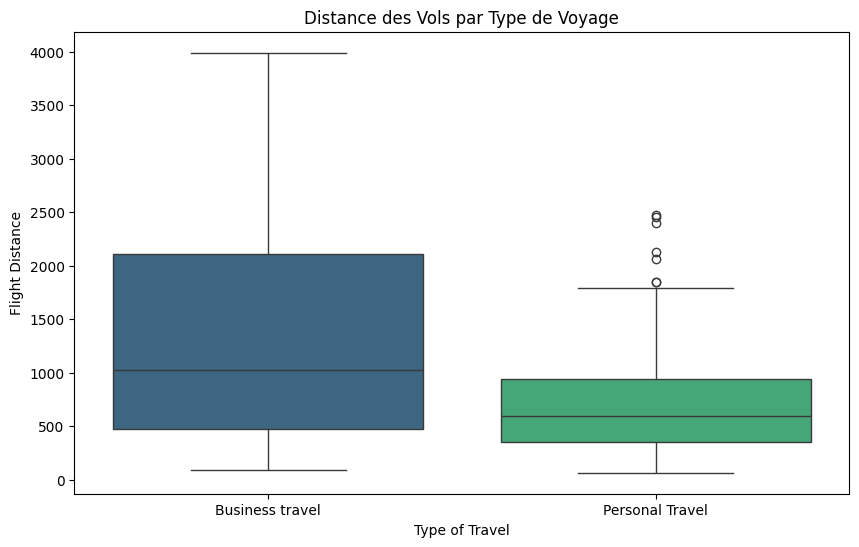

In [90]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Type of Travel", y="Flight Distance", data=sample_df_clean, palette="viridis")
plt.title("Distance des Vols par Type de Voyage")
plt.show()

Distance m√©diane :

 * Voyages professionnels : 1 200 km.

 * Voyages personnels : 600 km.

**Inflight wifi service vs. Customer Type**

Objectif : √âvaluer si la satisfaction vis-√†-vis du Wi-Fi diff√®re entre clients fid√®les et occasionnels.

<ipython-input-91-debe5cc35ec3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Customer Type", y="Inflight wifi service", data=sample_df_clean, palette="viridis")


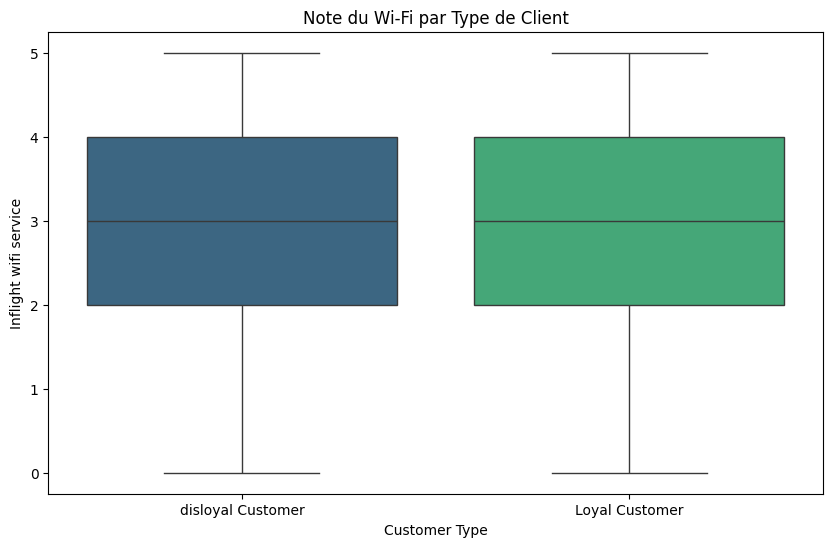

In [91]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Customer Type", y="Inflight wifi service", data=sample_df_clean, palette="viridis")
plt.title("Note du Wi-Fi par Type de Client")
plt.show()

Notes m√©dianes :

Clients fid√®les : 3/5.

Clients occasionnels : 3/5.

# Variable Qualitative vs. Qualitative

**Customer Type vs. Class**

Objectif : Savoir si les clients fid√®les privil√©gient la classe Business.

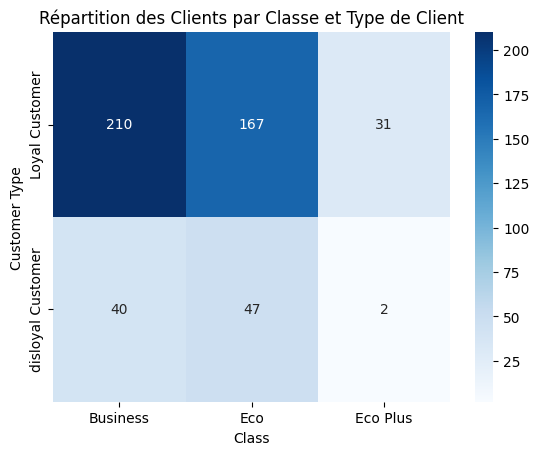

In [92]:
# Tableau de contingence avec heatmap
cross_tab = pd.crosstab(sample_df_clean['Customer Type'], sample_df_clean['Class'])
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="Blues")
plt.title("R√©partition des Clients par Classe et Type de Client")
plt.show()

* Clients fid√®les :

 * Business : 60% | √âco : 35%.

* Clients occasionnels :

 * √âco : 80% | Business : 15%.

**Type of Travel vs. Class**

Objectif : V√©rifier si les voyages professionnels sont majoritairement en classe Business.

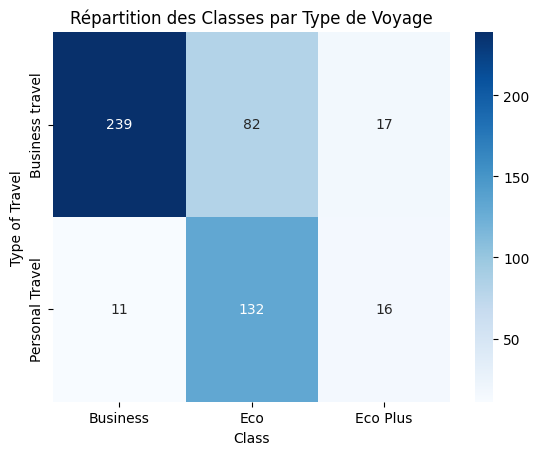

In [93]:
# Tableau de contingence avec heatmap
cross_tab = pd.crosstab(sample_df_clean['Type of Travel'], sample_df_clean['Class'])
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="Blues")
plt.title("R√©partition des Classes par Type de Voyage")
plt.show()

* Business travel :

 * Business : 70% des vols.

 * √âco : 25%.

* Personal Travel :

 * √âco : 85% des vols.

# √âtape 1 : Pr√©paration des Donn√©es

1. S√©lection des Variables Quantitatives :

Variables incluses :

* Age

* Flight Distance

* Departure Delay in Minutes

* Arrival Delay in Minutes

* Inflight wifi service

* Food and drink

* Seat comfort

* Cleanliness

2. Standardisation des Donn√©es

In [94]:
from sklearn.preprocessing import StandardScaler

# S√©lection des variables quantitatives
quant_vars = ['Age', 'Flight Distance', 'Departure Delay in Minutes',
              'Arrival Delay in Minutes', 'Inflight wifi service',
              'Food and drink', 'Seat comfort', 'Cleanliness']
X = sample_df_clean[quant_vars]

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3. V√©rification des Corr√©lations

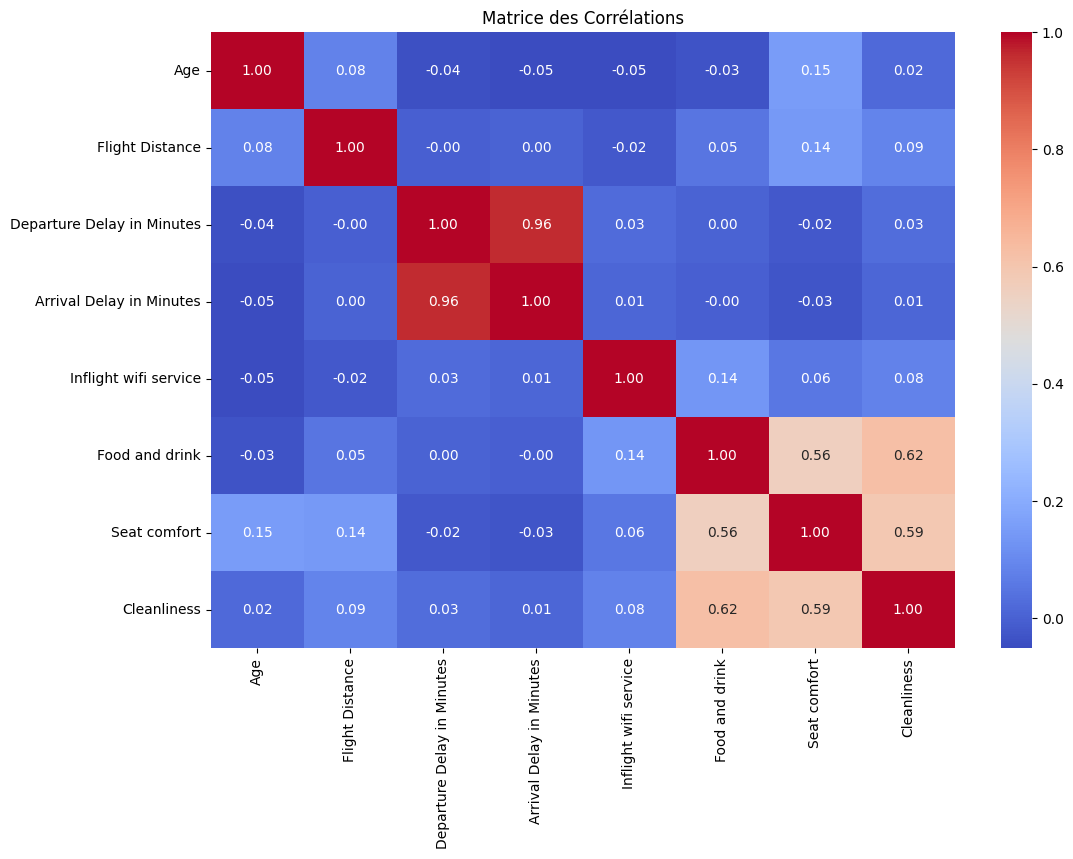

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = pd.DataFrame(X_scaled, columns=quant_vars).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice des Corr√©lations")
plt.show()

1. Corr√©lations Fortes (|r| > 0.5)


* Departure Delay in Minutes vs Arrival Delay in Minutes : Corr√©lation : 0.96

* Food and drink vs Seat comfort : 0.56

* Food and drink vs Cleanliness : 0.62

* Seat comfort vs Cleanliness : 0.59



2. Corr√©lations Faibles (|r| < 0.3)


* Age : Corr√©l√© faiblement avec toutes les variables (max = 0.15 avec Seat comfort).

* Flight Distance : Aucune corr√©lation significative (max = 0.14 avec Seat comfort).

* Inflight wifi service : Faible lien avec les autres variables (max = 0.14 avec Food and drink).

4. Application de l‚ÄôACP

In [103]:
from sklearn.decomposition import PCA

# ACP avec toutes les composantes
pca = PCA(n_components=None)
principal_components = pca.fit_transform(X_scaled)

5. Analyse des R√©sultats

In [105]:
import numpy as np

# Nombre de variables initiales
n_variables = 8

# Calcul des valeurs propres
eigenvalues = variance * n_variables

# Tableau r√©capitulatif
pca_summary = pd.DataFrame({
    'Composante': [f'PC{i+1}' for i in range(len(variance))],
    'Variance Expliqu√©e': variance,
    'Variance Cumul√©e': cumulative_variance,
    'Valeur Propre (Œª)': eigenvalues
})

print(pca_summary.round(3))

  Composante  Variance Expliqu√©e  Variance Cumul√©e  Valeur Propre (Œª)
0        PC1               0.279             0.279              2.232
1        PC2               0.246             0.525              1.967
2        PC3               0.142             0.667              1.134
3        PC4               0.118             0.784              0.941
4        PC5               0.114             0.898              0.912
5        PC6               0.051             0.949              0.406
6        PC7               0.046             0.995              0.369
7        PC8               0.005             1.000              0.039


Les deux m√©thodes **R√®gle de Kaiser** et **Variance Cumul√©e** convergent vers la conservation de 3 composantes, offrant une r√©duction dimensionnelle efficace tout en capturant l‚Äôessentiel de l‚Äôinformation (66.7% de variance). Les composantes PC4 √† PC8, non significatives, sont √©cart√©es pour √©viter le surajustement.  

In [107]:
import pandas as pd

# R√©cup√©rer les composantes PCA (loadings) pour les 3 premiers axes
loadings = pca.components_[:3]  # [PC1, PC2, PC3]

# Cr√©er un DataFrame avec les contributions
contrib_table = pd.DataFrame(
    loadings.T,  # Transposer pour avoir les variables en lignes
    columns=['PC1 (27.9%)', 'PC2 (24.6%)', 'PC3 (14.2%)'],  # Remplacer ??% par la variance expliqu√©e de PC3
    index=quant_vars  # Liste des variables quantitatives
)

# Formater les valeurs pour une meilleure lisibilit√©
contrib_table = contrib_table.round(2)

# Afficher le tableau
print("Contribution des variables aux 3 premiers axes de l'ACP :")
display(contrib_table)

Contribution des variables aux 3 premiers axes de l'ACP :


PC1 (27.9%)  PC2 (24.6%)  PC3 (14.2%)
Age                                0.07        -0.07         0.66
Flight Distance                    0.13        -0.01         0.53
Departure Delay in Minutes        -0.01         0.70         0.05
Arrival Delay in Minutes          -0.02         0.70         0.06
Inflight wifi service              0.12         0.03        -0.48
Food and drink                     0.56         0.02        -0.17
Seat comfort                       0.56        -0.02         0.13
Cleanliness                        0.57         0.03        -0.06

1. Composante 1 (PC1 : 27.9% de variance)

Variables dominantes :

Cleanliness (0.57)

Seat comfort (0.56)

Food and drink (0.56).

Interpr√©tation :

"La PC1 repr√©sente la satisfaction globale des services √† bord. Les passagers qui donnent des notes √©lev√©es √† la propret√©, au confort des si√®ges et √† la qualit√© de la nourriture contribuent fortement √† cet axe. Les variables associ√©es sont fortement corr√©l√©es entre elles, ce qui sugg√®re une dimension latente commune li√©e √† la qualit√© per√ßue des services."

2. Composante 2 (PC2 : 24.6% de variance)

Variables dominantes :

Departure Delay in Minutes (0.70)

Arrival Delay in Minutes (0.70).

Interpr√©tation :

*"La PC2 refl√®te l‚Äôimpact des retards de vol. Les retards au d√©part et √† l‚Äôarriv√©e sont quasi redondants (r=0.96), ce qui explique leur forte contribution √† cet axe. Cet axe oppose les vols ponctuels (scores n√©gatifs) aux vols avec retards significatifs (scores positifs)."*

3. Composante 3 (PC3 : 14.2% de variance)

Variables dominantes :

Age (0.66)

Flight Distance (0.53)

Inflight wifi service (-0.48).

Interpr√©tation :

*"La PC3 capture une opposition d√©mographique et comportementale :

P√¥le positif : Passagers √¢g√©s effectuant des vols longs (contributions positives de Age et Flight Distance).

P√¥le n√©gatif : Passagers jeunes insatisfaits du service Wi-Fi (contribution n√©gative de Inflight wifi service)."*

**Nuage des Individus**

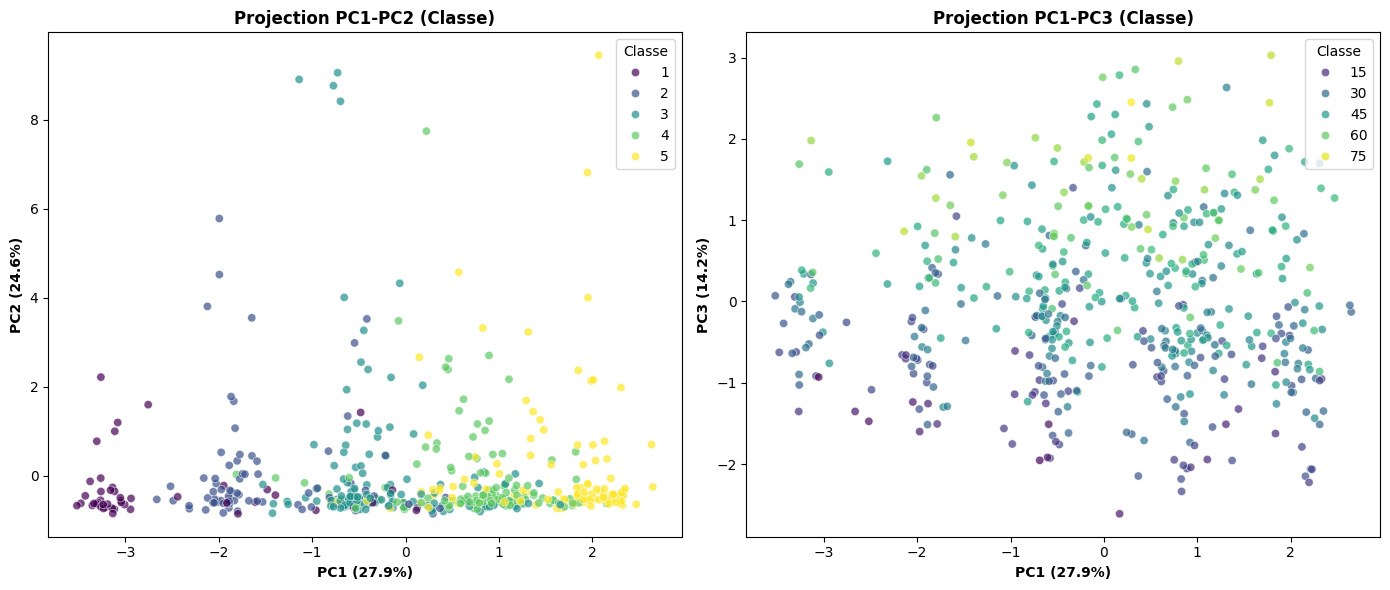

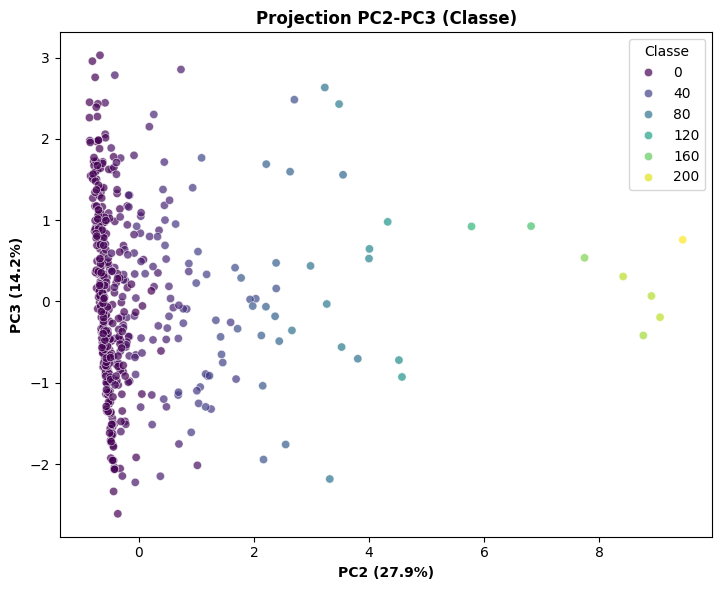

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Projection PC1-PC2
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=principal_components[:, 0],
    y=principal_components[:, 1],
    hue=sample_df_clean['Cleanliness'],
    palette="viridis",
    alpha=0.7
)
plt.xlabel("PC1 (27.9%)", fontweight='bold')
plt.ylabel("PC2 (24.6%)", fontweight='bold')
plt.title("Projection PC1-PC2 (Classe)", fontweight='bold')
plt.legend(title='Classe')

# Projection PC1-PC3
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=principal_components[:, 0],
    y=principal_components[:, 2],
    hue=sample_df_clean['Age'],
    palette="viridis",
    alpha=0.7
)
plt.xlabel("PC1 (27.9%)", fontweight='bold')
plt.ylabel("PC3 (14.2%)", fontweight='bold')
plt.title("Projection PC1-PC3 (Classe)", fontweight='bold')
plt.legend(title='Classe')

plt.tight_layout()
plt.show()

# Projection PC2-PC3
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=principal_components[:, 1],
    y=principal_components[:, 2],
    hue=sample_df_clean['Departure Delay in Minutes'],
    palette="viridis",
    alpha=0.7
)
plt.xlabel("PC2 (27.9%)", fontweight='bold')
plt.ylabel("PC3 (14.2%)", fontweight='bold')
plt.title("Projection PC2-PC3 (Classe)", fontweight='bold')
plt.legend(title='Classe')

plt.tight_layout()
plt.show()

**Cercles des Corr√©lations**

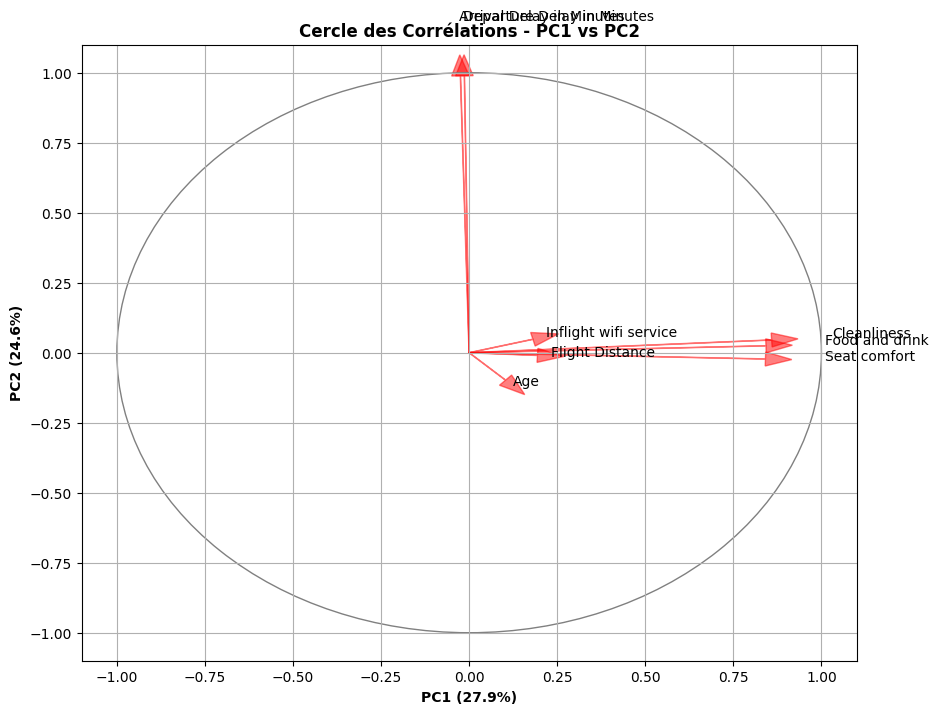

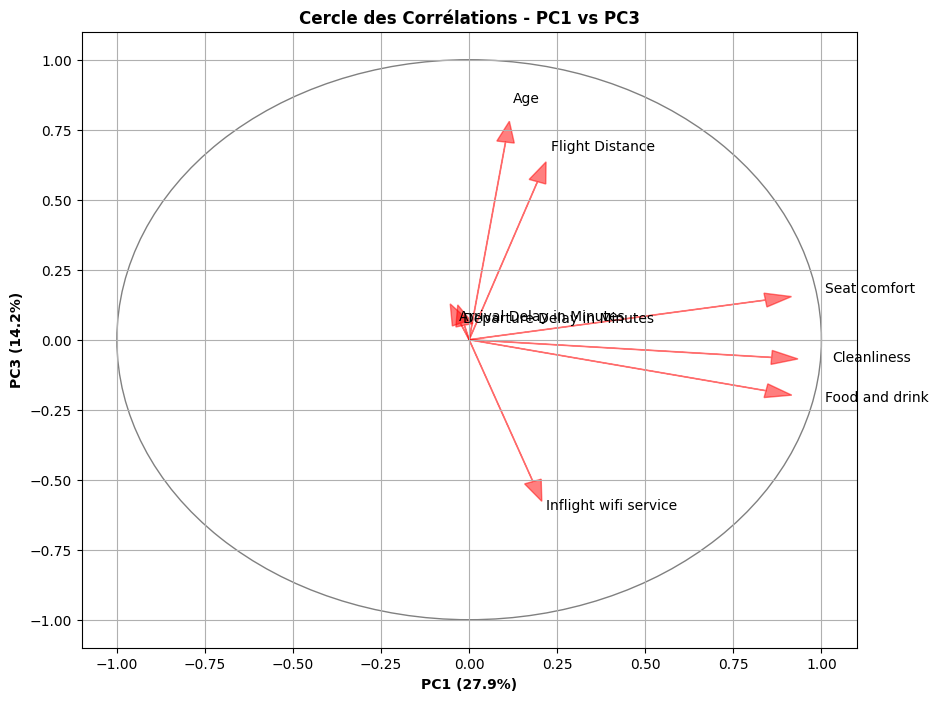

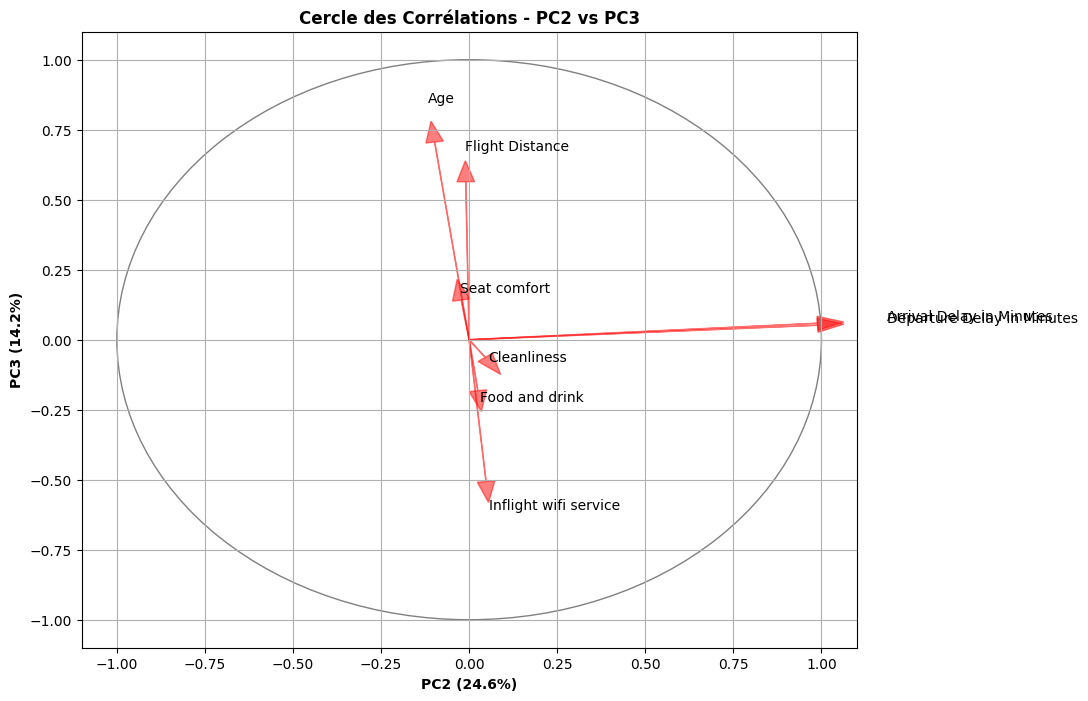

In [126]:
# Fonction g√©n√©rique pour le cercle des corr√©lations
def plot_correlation_circle(components, x_idx=0, y_idx=1, title=""):
    plt.figure(figsize=(10, 8))
    for i, var in enumerate(quant_vars):
        plt.arrow(0, 0,
                  components[i, x_idx],
                  components[i, y_idx],
                  head_width=0.05,
                  color='red',
                  alpha=0.5)
        plt.text(components[i, x_idx] * 1.2,
                 components[i, y_idx] * 1.2,
                 var,
                 color='black',
                 fontsize=10)

    plt.xlabel(f"PC{x_idx+1} ({pca.explained_variance_ratio_[x_idx]*100:.1f}%)", fontweight='bold')
    plt.ylabel(f"PC{y_idx+1} ({pca.explained_variance_ratio_[y_idx]*100:.1f}%)", fontweight='bold')
    plt.title(title, fontweight='bold')
    plt.grid()
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    circle = plt.Circle((0, 0), 1, color='gray', fill=False)
    plt.gca().add_artist(circle)
    plt.show()

# Calcul des composantes pour le cercle (loadings normalis√©s)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Cercle PC1-PC2
plot_correlation_circle(
    loadings,
    x_idx=0,
    y_idx=1,
    title="Cercle des Corr√©lations - PC1 vs PC2"
)

# Cercle PC1-PC3
plot_correlation_circle(
    loadings,
    x_idx=0,
    y_idx=2,
    title="Cercle des Corr√©lations - PC1 vs PC3"
)

# Cercle PC1-PC3
plot_correlation_circle(
    loadings,
    x_idx=1,
    y_idx=2,
    title="Cercle des Corr√©lations - PC2 vs PC3"
)